In [1]:
import pandas as pd
import pandas_ta as ta

In [2]:
df = pd.read_excel("HINDALCO_1D.xlsx")

In [3]:
sti = ta.supertrend(df['high'], df['low'], df['close'], length=7, multiplier=3)
df = pd.concat([df, sti], axis=1)

In [4]:
psar = df.ta.psar(high=df['high'], low=df['low'], close=df['close'], af0=0.02, af=0.02, max_af=0.2)
df = pd.concat([df, psar], axis=1)

In [5]:
# sti2 = ta.supertrend(df['high'], df['low'], df['close'], length=7, multiplier=1.5)
# df = pd.concat([df, sti2], axis=1)

In [6]:
# df.dropna(subset=['SUPERT_7_3.0'], inplace=True)

In [7]:
df

,datetime,close,high,low,open,volume,instrument,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2
0,2014-01-24,114.00,115.35,113.00,113.15,5737135,HINDALCO,0.000000,1,NaN,NaN,NaN,NaN,0.02,0
1,2014-01-27,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,1,NaN,NaN,NaN,226.050000,0.04,0
2,2014-01-28,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,1,NaN,NaN,NaN,221.380000,0.04,0
3,2014-01-29,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,1,NaN,NaN,NaN,216.896800,0.04,0
4,2014-01-30,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,1,NaN,NaN,NaN,212.592928,0.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,2018-12-21,224.00,227.45,221.80,224.25,6933691,HINDALCO,239.883478,-1,NaN,239.883478,NaN,229.120310,0.04,0
1211,2018-12-24,217.85,224.00,216.95,224.00,4667022,HINDALCO,239.509277,-1,NaN,239.509277,NaN,228.413497,0.04,0
1212,2018-12-26,218.60,219.80,212.90,213.85,6554865,HINDALCO,235.622237,-1,NaN,235.622237,NaN,227.734957,0.04,0
1213,2018-12-27,220.60,223.90,219.60,221.40,7947144,HINDALCO,235.622237,-1,NaN,235.622237,NaN,227.083559,0.04,0


In [9]:
df.to_csv('df.csv')

<Axes: >

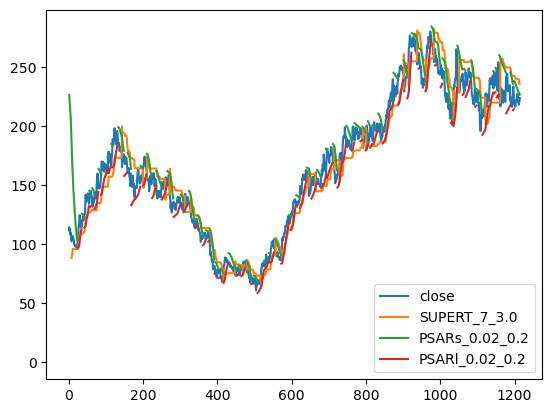

In [11]:
df[['close','SUPERT_7_3.0',"PSARs_0.02_0.2",'PSARl_0.02_0.2']].plot() #,'SUPERTl_7_3.0','SUPERTs_7_3.0',"PSARs_0.02_0.2",'PSARl_0.02_0.2'

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Initialize cumulative volume variable
cumVol = 0.0

# Calculate the On-Balance Volume (OBV)
obv = np.cumsum(np.sign(np.diff(df['close'])) * df['volume'])

ValueError: operands could not be broadcast together with shapes (1214,) (1215,) 

In [15]:
# Calculate the On-Balance Volume (OBV)
obv = np.where(df['close'].diff() > 0, df['volume'], -df['volume']).cumsum()

# To handle NaN values in the 'volume' column, you can use the fillna() method
# to convert them to 0 before performing the cumulative sum
obv = pd.Series(obv).fillna(0).values

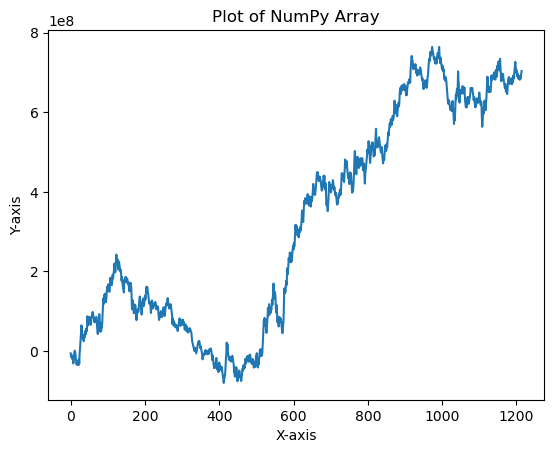

In [20]:
x = np.arange(len(obv))

# Plot the data using matplotlib
plt.plot(x, obv)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of NumPy Array')

# Show the plot
plt.show()